In [ ]:
# @title <h1>Lab 2 : Risoluzione di sistemi lineari  </h1>
%%html
<marquee style='width: 50%; color: red;'><b>Questi esercizi possono essere chiesto all'esame!</b></marquee>

# **MATRICI e NORME**

---
Considera la matrice A
\begin{equation*}
A = 
\begin{pmatrix}
1 & 2  \\
0.499  & 1.001  
\end{pmatrix}
\end{equation*}

* Calcola la norma 1, la norma 2, la norma Frobenius e la norma infinito di A con ${\tt numpy.linalg.norm()}$ (guarda l'help della funzione).
* Calcola il numero di condizionamento di A con ${\tt numpy.linalg.cond()}$ (guarda l'help della funzione).
* Considera il vettore colonna $x = (1,1)^T$ e calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$.
* Considera ora il vettore ${\tilde b} = (3, 1.4985)^T$ e verifica che ${\tilde x} = (2, 0.5)^T$ è soluzione del sistema $A{\tilde x} = {\tilde b}$
* Calcola la norma 2 della perturbazione sui termini noti $ \Delta_b  = \| b - {\tilde b} \|_2$ e la norma 2 della perturbazione sulle soluzioni $ \Delta_x = \| x - {\tilde x} \|_2$. Confronta $\Delta_b$ con $\Delta_x$.


In [ ]:
import numpy as np
import sys

# https://numpy.org/doc/stable/reference/

In [ ]:
#help(np.linalg) # View source

#help (np.linalg.norm)
#help (np.linalg.cond)

In [ ]:
A = np.array([[1, 2], [0.499, 1.001]])
print ('Norme di A:')

norm1 = np.linalg.norm(A,1)
norm2 =  np.linalg.norm(A,2)
normfro = np.linalg.norm(A,'fro')
norminf = np.linalg.norm(A,np.inf)

print('Norma1 = ', norm1, '\n')
print('Norma2 = ', norm2, '\n')
print('Normafro = ', normfro, '\n')
print('Norma infinito = ', norminf, '\n')

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)

print ('K(A)_1 = ', cond1, '\n')
print ('K(A)_2 = ', cond2, '\n')
print ('K(A)_fro =', condfro, '\n')
print ('K(A)_inf =', condinf, '\n')

#x = np.array([[1], [1]])
x = np.ones((2, 1))
#x = np.array([[1, 1]]).T

# Ax = b

b = A.dot(x)

print ('b=',b,'\n')

btilde = np.array([[3], [1.4985]])
#xtilde = np.array([[2], [0.5]])
xtilde = np.array([[2, 0.5]]).T

# Verificare che xtilde è soluzione di A xtilde = btilde
# A * xtilde = btilde
print ('A*xtilde = ', A.dot(xtilde) , '\n')

deltax = np.linalg.norm(x-xtilde, ord=2)
deltab = np.linalg.norm(b-btilde, ord=2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Normafro =  2.5002003919686118 

Norma infinito =  3.0 

K(A)_1 =  3001.0000000001082 

K(A)_2 =  2083.6668534103555 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

b= [[3. ]
 [1.5]] 

A*xtilde =  [[3.    ]
 [1.4985]] 

delta x =  1.118033988749895
delta b =  0.0015000000000000568


# **METODI DIRETTI**

---

La soluzione viene calcolata in un numero finito di passi, modificando la matrice del problema in modo da rendere piú agevole il calcolo della soluzione.

*   Con matrici triangolari: metodi di sostituzione;
*   Con qualsiasi matrice: metodo di eliminazione di Gauss;
*   Con matrici simmetriche: metodo di Cholesky.


# Esercizio 1

Considera la matrice
\begin{equation*}
A = 
\begin{pmatrix}
3 & -1 & 1 & -2 \\
0 & 2  & 5 & -1 \\
1 & 0  &-7 &  1 \\
0 & 2  & 1 &  1  
\end{pmatrix}
\end{equation*}

1. Crea il problema test in cui il vettore della soluzione esatta è $ x = (1, 1, 1, 1)^T$ e il vettore termine noto è $b = Ax$.
2. Guarda l'help del modulo ${\tt scipy.linalg.decomp\_lu}$ e usa una delle sue funzioni per calcolare la fattorizzazione LU di A con pivolting. Verifica la correttezza dell'output.
3. Risolvi il sistema lineare con la funzione ${\tt lu\_solve}$ del modulo decomp_lu oppure con ${\tt scipy.linalg.solve\_triangular}$.
4. Visualizza la soluzione calcolata e valutane la correttezza.



In [ ]:
#this only affects numpy arrays, not scalars
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})  # oppure np.set_printoptions(precision=4)

In [ ]:
# 1. creazione del problema test

A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)

print (A)
print ('K(A) = ', np.linalg.cond(A,1),)

n = A.shape[1]

x = np.ones((n,1))
b = np.matmul(A,x)


[[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [1.00 0.00 -7.00 1.00]
 [0.00 2.00 1.00 1.00]]
K(A) =  25.666666666666668


In [ ]:
import scipy
# help (scipy)

# DESCRIPTION
#    SciPy: A scientific computing package for Python
#    Documentation is available in the docstrings and online at https://docs.scipy.org.
# https://docs.scipy.org/doc/scipy/reference/

In [ ]:
import scipy.linalg
# help (scipy.linalg)
import scipy.linalg.decomp_lu as LUdec # è un module, con ['lu', 'lu_solve', 'lu_factor']
#help (LUdec)
#help(LUdec.lu_factor)
#help(LUdec.lu_solve)

In [ ]:
# IMPLEMENTAZIONE 1

# fattorizzazione
#A=PLU e non PA=LU

lu, piv =LUdec.lu_factor(A)

print('lu',lu,'\n')
print('piv',piv,'\n')

# risoluzione di    Ax = b   <--->  PLUx = b 
my_x=LUdec.lu_solve((lu,piv),b)


# verifica
print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.2f' %my_x[i])



lu [[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [0.33 0.17 -8.17 1.83]
 [0.00 1.00 0.49 1.10]] 

piv [0 1 2 3] 


Soluzione calcolata: 
1.00
1.00
1.00
1.00


In [ ]:
#ERRORE RELATIVO
err=np.linalg.norm(my_x-x,2)/np.linalg.norm(x)
print('%e',err)

%e 3.510833468576701e-16


In [ ]:
# IMPLEMENTAZIONE ALTERNATIVA - 1
#help(LUdec.lu)
#help(scipy.linalg.solve_triangular)

In [ ]:
P, L, U = LUdec.lu(A)  #  A = P*L*U (non P*A = L*U)
print ('A = ', A)
print ('P = ', P)
print ('L = ', L)
print ('U = ', U)
print ('P*L*U = ', np.matmul(P , np.matmul(L, U))) 

print ('diff = ',   np.linalg.norm(A - np.matmul(P , np.matmul(L, U)), 'fro'  ) ) 

# if P != np.eye(n): 
# Ax = b   <--->  PLUx = b  <--->  LUx = inv(P)b  <--->  Ly=inv(P)b & Ux=y : matrici triangolari
# quindi
invP = np.linalg.inv(P)
y = scipy.linalg.solve_triangular( L , np.matmul(invP,b), lower=True, unit_diagonal=True)
my_x = scipy.linalg.solve_triangular(U, y, lower=False)

# if P == np.eye(n): 
# Ax = b   <--->  PLUx = b  <--->  PLy=b & Ux=y
# y = scipy.linalg.solve_triangular(np.matmul(P,L) , b, lower=True, unit_diagonal=True)
# my_x = scipy.linalg.solve_triangular(U, y, lower=False)

print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.2f' %my_x[i])

A =  [[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [1.00 0.00 -7.00 1.00]
 [0.00 2.00 1.00 1.00]]
P =  [[1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00]
 [0.00 0.00 1.00 0.00]
 [0.00 0.00 0.00 1.00]]
L =  [[1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00]
 [0.33 0.17 1.00 0.00]
 [0.00 1.00 0.49 1.00]]
U =  [[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [0.00 0.00 -8.17 1.83]
 [0.00 0.00 0.00 1.10]]
P*L*U =  [[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [1.00 0.00 -7.00 1.00]
 [0.00 2.00 1.00 1.00]]
diff =  1.5700924586837752e-16

Soluzione calcolata: 
1.00
1.00
1.00
1.00


# Esercizio 2

Ripeti l'esercizio 1 sulla matrice di Hilbert, creata con ${\tt A = scipy.linalg.hilbert(n)}$ per $n=10,\ldots,20$. In particolare:
* calcola il numero di condizionamento di A
* Considera il vettore colonna $x = (1,\ldots,1)^T$, calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$ e la relativa soluzione $\tilde{x}$ usando la fattorizzazione LU come nel caso precedente.

In [ ]:
n=14
A=scipy.linalg.hilbert(n)

x=np.ones((n,1))

#print('A: \n',A)
print('x: \n',x,'\n')
print('K(A)',np.linalg.cond(A,2),'\n')

b=np.matmul(A,x)

#fattorizzazione LU di A
lu ,piv=LUdec.lu_factor(A)
#P,L,U=...

#risoluzione
my_x=LUdec.lu_solve((lu,piv),b)
#y=...
#my_x=..

#errore
err=np.linalg.norm(my_x-x,2)/np.linalg.norm(x,2)

print('err=',err)




x: 
 [[1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]] 

K(A) 3.25920065289962e+17 

err= 3.6730098233402546


In [ ]:
K_A=np.zeros((20,1))
Err=np.zeros((20,1))
for n in np.arange(10,30):
  A=scipy.linalg.hilbert(n)
  x=np.ones((A.shape[1],1))
  b=np.matmul(A,x)
  K_A[n-10]=np.linalg.cond(A)
  lu ,piv=LUdec.lu_factor(A)
  my_x=LUdec.lu_solve((lu,piv),b)
  Err[n-10]=np.linalg.norm(my_x-x,2)/np.linalg.norm(x)


In [ ]:
import matplotlib.pyplot as plt

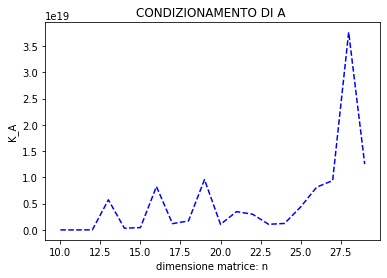

In [ ]:
x = np.arange(10,30)

plt.plot(x,K_A,color='blue', linestyle='--')
plt.title('CONDIZIONAMENTO DI A ')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K_A')


plt.show()

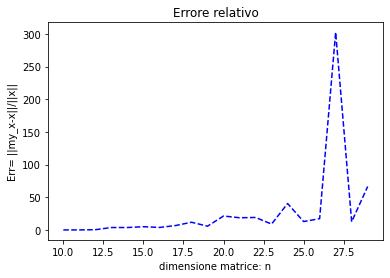

In [ ]:
x = np.arange(10,30)

plt.plot(x,Err,color='blue', linestyle='--')
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')


plt.show()

# Esercizio 3
Scrivi le due funzioni ${\tt LTrisol()}$ e ${\tt UTrisol()}$ per implementare i metodi di sostituzione all'avanti e all'indietro, poi:
* usa la fattorizzazione ${\tt P, L, U = LUdec.lu(A) }$ sulla matrice degli esercizi precedenti;
* risolvi i sistemi triangolari usando la tue funzioni.



In [ ]:
def LTrisol(L,b):
  n=b.size
  x=np.zeros(n)
  x[0]=  b[0]/L[0,0];
  for i in range(1,n):
    x[i]=(b[i]-np.dot(L[i,0:i],x[0:i]))/L[i,i];
  return x

def UTrisol(U,b):
  n=b.size
  x=np.zeros(n)
  x[n-1]=  b[n-1]/U[n-1,n-1];
  for i in range(n-1,-1,-1):
    x[i]=(b[i]-np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i];
  return x

A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)
n = A.shape[1]
x = np.ones( (n,1) )
b = np.matmul(A, x)

P, L, U = LUdec.lu(A)

# if P == np.eye(n):
# Ax = b   <--->  LUx = b  <--->  Ly=b & Ux=y
# y = LTrisol(L,b)
# my_x = UTrisol(U,y)

# if P != np.eye(n): 
# Ax = b   <--->  PLUx = b  <--->  LUx = Pb  <--->  Ly=Pb & Ux=y
Pinv = np.linalg.inv(P)
y = LTrisol(L, np.matmul(Pinv,b) )
my_x = UTrisol(U,y)

print('\nSoluzione parziale y:' )
for i in range(n):
    print('%0.2f' %y[i])
print('\nSoluzione calcolata:' )
for i in range(n):
    print('%0.2f' %my_x[i])


Soluzione parziale y:
1.00
6.00
-6.33
1.10

Soluzione calcolata:
1.00
1.00
1.00
1.00


# Esercizio 4

Comprendere i seguenti codici che implementano la fattorizzazione LU senza pivoting.

In [ ]:
# LU senza pivoting

def LU_fact_NOpiv(A):
  a = np.copy(A)
  n=a.shape[1]
  
  for k in range(n-1):
    if a[k, k] != 0:
      a[k+1:, k] = a[k+1:, k]/a[k,k]
      
      a1 = np.expand_dims(a[k+1:, k], 1)
      a2 = np.expand_dims(a[k, k+1:], 0)
      a[k+1:, k+1:] = a[k+1:, k+1:] - (a1 * a2)
  return a

# Esercizio 5
Calcola la fattorizzazione di Choleski sulla matrice A generata come

${\tt A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)}$
${\tt A = np.matmul( A, np.transpose(A) )}$

usando la funzione ${\tt np.linalg.cholesky}$.
* Verifica la correttezza della fattorizzazione.
* Risolvi il sistema lineare Ax = b dove ${\tt x = (1, 1, 1, 1)^T}$ . 

In [ ]:
help(np.linalg.cholesky)

In [ ]:
A=np.array([[3,-1,1,-2],[0,2,5,-1],[1,0,-7,1],[0,2,1,1]],dtype=np.float)
A=np.matmul(A,np.transpose(A))
L=np.linalg.cholesky(A)

print('A: \n',A,'\n')
print('L: \n',L,'\n')
print('LL^t: \n',L@L.T,'\n')
print('K(A):',np.linalg.cond(A,2),'\n')

x=np.ones((A.shape[1],1))

b=np.matmul(A,x)
print('b: \n',b)


A: 
 [[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]] 

L: 
 [[ 3.87298335  0.          0.          0.        ]
 [ 1.29099445  5.32290647  0.          0.        ]
 [-1.54919334 -6.38748777  2.79284801  0.        ]
 [-0.77459667  1.69080559  1.28900677  0.93789019]] 

LL^t: 
 [[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]] 

K(A): 201.87778922244505 

b: 
 [[11.]
 [ 7.]
 [ 3.]
 [ 5.]]


In [ ]:
help(np.linalg.cholesky)

# **METODI ITERATIVI**

---

Calcolo di una soluzione come limite di una successione di approssimazioni $x_k$, senza modificare la struttura della matrice A. Sono metodi adatti per sistemi di grandi dimensioni con matrici sparse (pochi elementi non nulli).
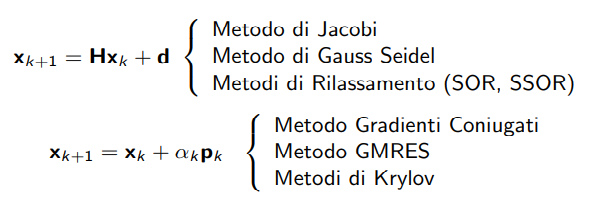

# Esercizio 6

Scrivi le funzioni 
${\tt Jacobi(A,b,x0,maxit,tol, xTrue)}$ e ${\tt GaussSeidel(A,b,x0,maxit,tol, xTrue)}$
per implementare i metodi di Jacobi e di Gauss Seidel per la risoluzione di sistemi lineari con matrice a diagonale dominante. In particolare:
* ${\tt x0}$ sia l'iterato iniziale;
* la condizione d'arresto sia dettata dal numero massimo di iterazioni consentite ${\tt maxit}$ e dalla tolleranza ${\tt tol}$ sulla differenza relativa fra due iterati successivi;
* si preveda in input la soluzione esatta ${\tt xTrue}$ per calcolare l'errore relativo ad ogni iterazione.

Entrambe le funzioni restituiscano in output:
* la soluzione ${\tt x}$;
* il numero ${\tt k}$ di iterazioni effettuate;
* il vettore ${\tt relErr}$ di tutti gli errori relativi.


In [ ]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  errIter[0]=tol+1
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while ( ite < maxit and errIter[ite] > tol ):   
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x_old[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] 
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)  #fine ciclo
  relErr=relErr[:ite]
  errIter=errIter[:ite]  
  return [x, ite, relErr,errIter]

In [ ]:
def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  errIter[0]=tol+1
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while ( ite < maxit and errIter[ite] > tol ):   
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] 
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)  #fine ciclo
  relErr=relErr[:ite]
  errIter=errIter[:ite] 
  return [x, ite, relErr, errIter]

#Esercizio 7
Testa le due funzioni dell'esercizio precedente per risolvere il sistema lineare Ax = b dove A è la matrice 10x10
\begin{equation*}
A = 
\begin{pmatrix}
5 & 1 & 0 & 0 & ... & 0 \\
1 & 5 & 1 & 0 & ... & 0 \\
0 & 1 & \ddots & \ddots & \vdots & \vdots \\
0 & 0 & \ddots & 5 & 1 & 0 \\
0 & 0 & ... & 1 &  5  & 1 \\
0 & 0 & ... & 0 &  1  & 5 \\
\end{pmatrix}
\end{equation*}
e ${\tt x = (1, 1, ..., 1)^T}$ la soluzione esatta.

Confronta i due metodi e grafica in un unico plot i due vettori ${\tt relErr}$.


In [ ]:
n = 10
A = 5*np.eye(n)
A = A + np.diag(np.ones(n-1),  1)
A = A + np.diag(np.ones(n-1),  -1)
print(A)

xTrue = np.ones( (n,1) )
b = np.matmul (A, xTrue) 


x0 = np.zeros( (n,1) )
maxit = 200
tol = 1.e-6
(xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A,b,x0,maxit,tol,xTrue) 
(xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A,b,x0,maxit,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])

print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])

[[5. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 5. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 5. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 5. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 5. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 5. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 5. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 5. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 5. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]]

Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


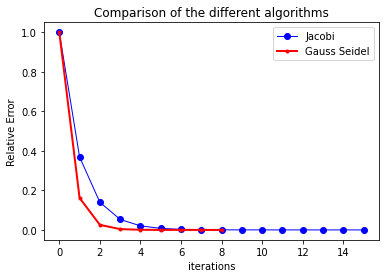

In [ ]:
#print ('Errore di Jacobi: ', np.linalg.norm(xJacobi-xTrue, 2) , ' in %d iterazioni' %kJacobi)
#print ('Errore di GS: ', np.linalg.norm(xGS-xTrue, 2) , ' in %d iterazioni\n' %kGS )

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

rangeJabobi = range (0, kJacobi)
rangeGS = range(0, kGS)

ax.plot(rangeJabobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='o'  )
ax.plot(rangeGS, relErrGS, label='Gauss Seidel', color = 'red', linewidth=2, marker='.' )
legend = ax.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('Relative Error')
plt.title('Comparison of the different algorithms')
plt.show()


